In [2]:
import torch
from torchview import draw_graph
import graphviz
import yaml
import random
import sys
sys.path.append("/home/axel/i3/LLP-at-IceCube/reconstruction/transformer-encoder/")
from llp_gap_reco.encoder import LLPTransformerModel
graphviz.set_jupyter_format('png')

'svg'

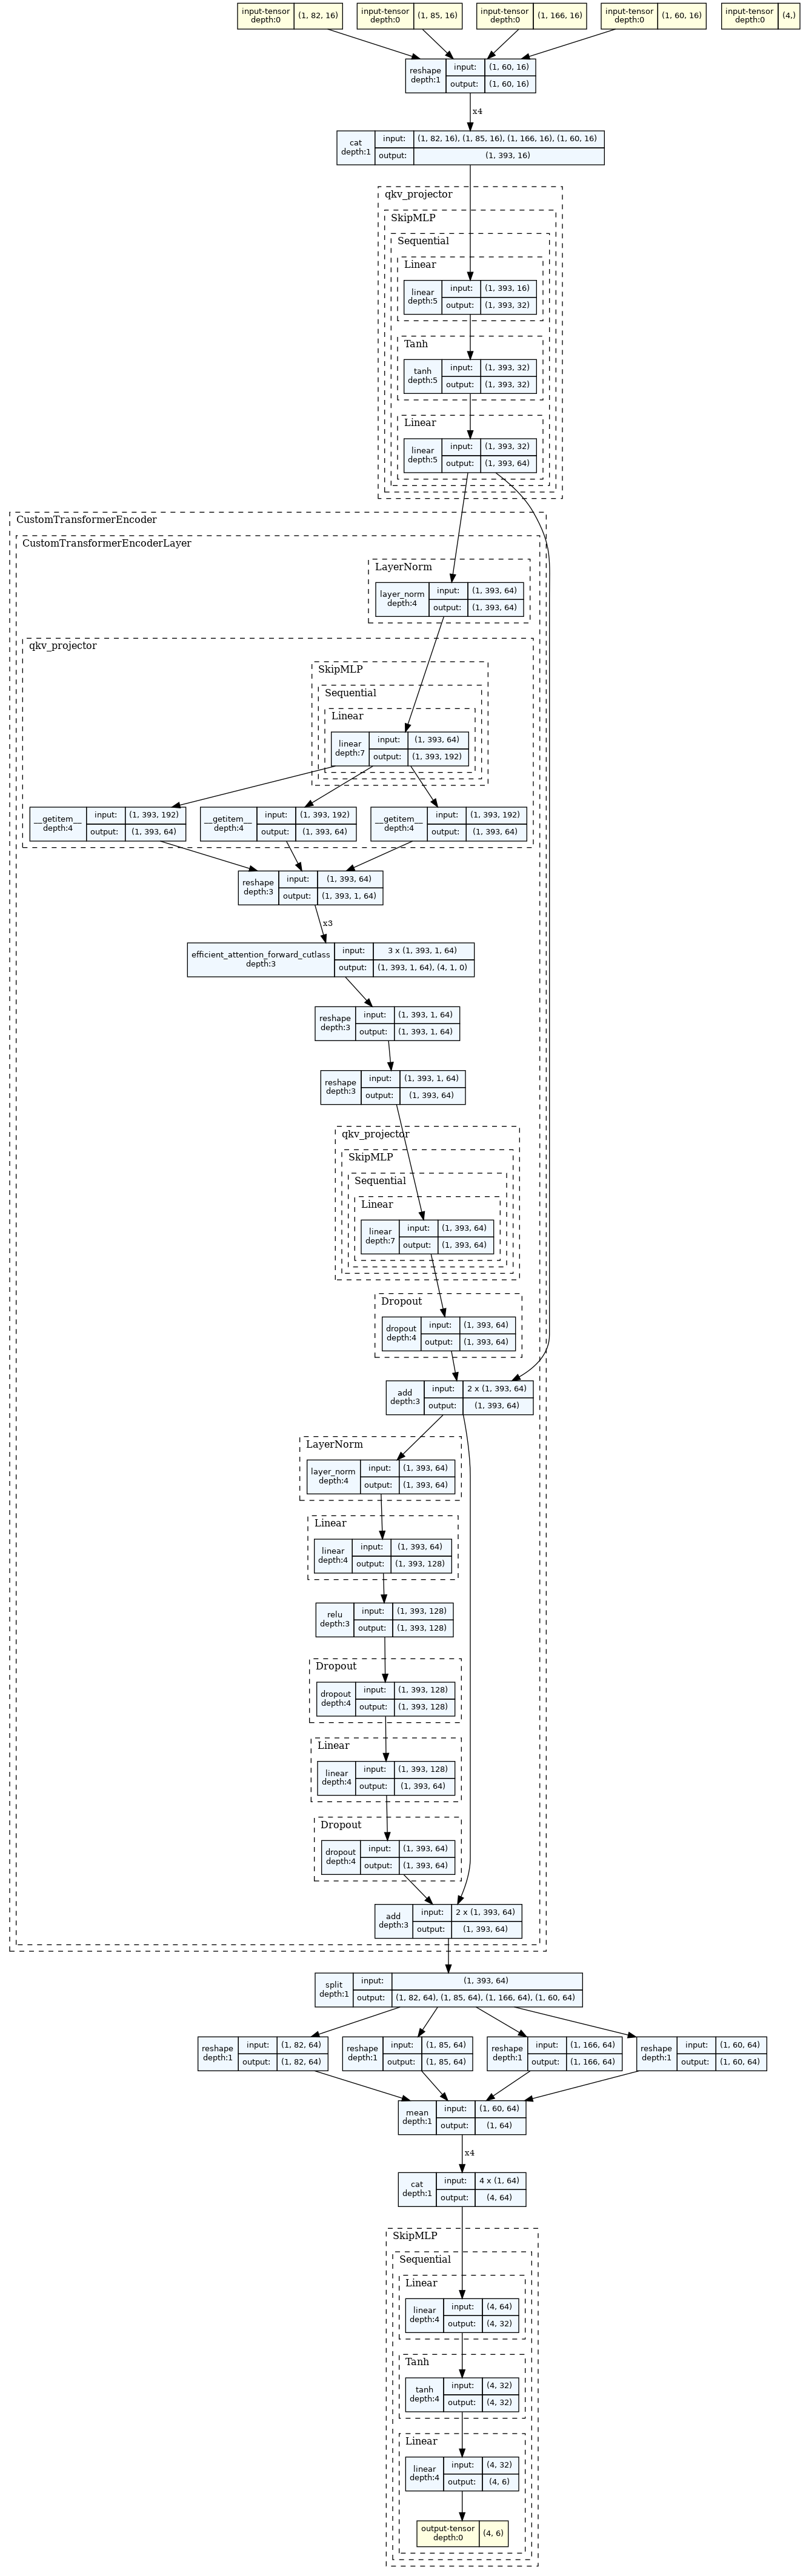

In [3]:
####### CREATE MODEL #######
# model settings
config_path = "/home/axel/i3/LLP-at-IceCube/reconstruction/transformer-encoder/configs/minimal_model.yaml"
with open(config_path, 'r') as stream:
    config = yaml.safe_load(stream)
kwargs_dict = config["settings"]

# create transformer encoder and cond. normalizing flow
model = LLPTransformerModel(**kwargs_dict)
model.eval()

batch_size = 4
seq_lens = [random.randint(50, 200) for _ in range(batch_size)]
datavecs = [torch.randn((1, seq_len, 16), dtype=torch.float32) for seq_len in seq_lens]
datalens = torch.Tensor([vec.shape[1] for vec in datavecs])
model_graph = draw_graph(model, input_data=[datavecs, datalens],
                         depth = 100,
                         expand_nested=True,
                         roll=True,
                         #hide_inner_tensors=False,
                         hide_module_functions=False,
                         #strict=False,
                         )
model_graph.visual_graph

